In [1]:
import matplotlib.pyplot as plt, numpy as np

def wiener(x):
    return x + np.random.normal(mu, sig)

N = int(1e3)

mu = np.zeros(3)
sig= np.ones(3)
x0 = np.random.normal(loc = mu, scale = sig)
results = np.zeros((N, 3))
results[0] = x0
for ti in range(N):
    results[ti] = wiener(results[ti - 1])
    



<IPython.core.display.Javascript object>


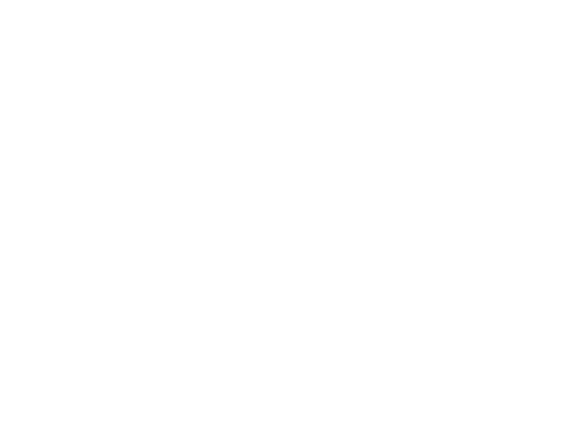

In [2]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw = dict(projection = '3d'))
ax.plot(*results.T)
fig.show()

<IPython.core.display.Javascript object>


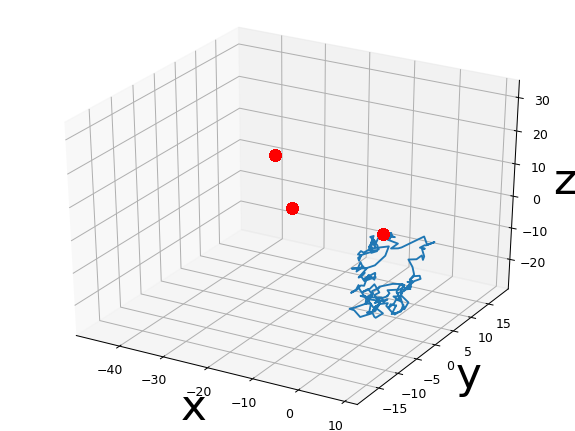

MovieWriter matplotlib.animation.PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [10]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw = dict(\
                                         projection = '3d')\
                      )
ax.set_position([0, 0, 1, 1])

fs = 35
ax.set_xlabel('x', fontsize = fs)
ax.set_ylabel('y', fontsize = fs)
ax.set_zlabel('z', fontsize = fs)
# ax.set_xlim(0, 50)
# ax.set_ylim(0, 50)
# ax.set_zlim(0, 50)
x, y, z = results.T
line = ax.plot(xs = x, ys = y, zs = z)[0]


causalStates = np.linspace(0, N - 1, 4, dtype = int)
fig.show(0)
def update(i):    
    if i in causalStates:
        ax.scatter(x[i], y[i], z[i], marker = 'o',
                   color = 'red',\
                  s = 75, alpha = .5)
        
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    

    ax.axes.relim()
    fig.canvas.flush_events()
    fig.canvas.draw()


anim = FuncAnimation(fig, update, \
         frames=np.linspace(0, N, 100, dtype = int),\
                    blit = 1, \
                    interval = 100,\
                    )
anim.save('diffusion.gif', \
          writer = 'matplotlib.animation.PillowWriter')